# Функции и библиотеки

## external

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
import seaborn as sns
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)

random.seed(0)

import time
t = []
t_nx = []

## graphlib

In [2]:
from graphlib.structures import Graph
import graphlib.algorithms as alg
import graphlib.tools as tls

# Загрузка данных

## graphlib

In [3]:
start = time.time()

G = Graph('CA-AstroPh')
with open('CA-AstroPh.txt', mode='r') as f:
    for line in f:
        u, v = line.split()
        G.add_edge(u, v)
print(G)

end = time.time()
t.append(end - start)

Граф <CA-AstroPh> с 18772 вершинами and 198110 ребрами


## external

In [4]:
start = time.time()

G_nx = nx.Graph()
with open('CA-AstroPh.txt', mode='r') as f:
    for line in f:
        u, v = line.split()
        G_nx.add_edge(u, v)
        
print(G_nx)

end = time.time()
t_nx.append(end - start)

Graph with 18772 nodes and 198110 edges


# Компоненты связности

## graphlib

In [5]:
start = time.time()

for i in range(10):
    number, largest_index, components = alg.DFS_with_cc(G, largest=True)

end = time.time()
t.append((end - start)/10)

In [6]:
start = time.time()

for i in range(10):
    largest_component = G.subgraph(nodes=components[largest_index])

end = time.time()
t.append((end - start)/10)

In [7]:
print(f'Количество компонент связности - {number}')
print(f'Наибольшая компонента связности: {largest_component.nodes_count} вершин и {largest_component.edges_count} ребер',)

Количество компонент связности - 290
Наибольшая компонента связности: 17903 вершин и 197031 ребер


In [8]:
nodes_in_largest_component = largest_component.nodes
print(f'Доля вершин в наибольшей компоненте слабой связности: {round(largest_component.nodes_count / G.nodes_count, 3)}')

Доля вершин в наибольшей компоненте слабой связности: 0.954


## external

In [9]:
start = time.time()

for i in range(10):
    cc_number_nx = nx.number_connected_components(G_nx)

end = time.time()
t_nx.append((end - start)/10)

In [10]:
start = time.time()

for i in range(10):
    largest_component_nx = G_nx.subgraph(nodes=max(nx.connected_components(G_nx), key=len))

end = time.time()
t_nx.append((end - start)/10)

In [11]:
print(f'Число компонент связности - {cc_number_nx}')
print(f'Наибольшая компонента состоит из {largest_component_nx.number_of_nodes()} вершин ' \
      f'и {largest_component_nx.number_of_edges()} ребер')

Число компонент связности - 290
Наибольшая компонента состоит из 17903 вершин и 197031 ребер


In [12]:
nodes_in_largest_component_nx = largest_component_nx.number_of_nodes()
print(f'Доля вершин в наибольшей компоненте слабой связности: {round(largest_component_nx.number_of_nodes() / G_nx.number_of_nodes(), 3)}')

Доля вершин в наибольшей компоненте слабой связности: 0.954


# Функция вероятности для степени узла в графе

## graphlib

In [13]:
start = time.time()

for i in range(10):
    degrees = list(map(lambda elem: elem[1], list(G.node_degrees())))

end = time.time()
t.append((end - start)/10)

In [14]:
print('Максимальная степень узла:', max(degrees))
print('Минимальная степень узла:', min(degrees))
print('Средняя степень узла:', int(sum(degrees)/len(degrees)))

Максимальная степень узла: 504
Минимальная степень узла: 1
Средняя степень узла: 21


## external

In [15]:
start = time.time()

for i in range(10):
    degrees_nx = list(map(lambda elem: elem[1], list(G_nx.degree())))

end = time.time()
t_nx.append((end - start)/10)

In [16]:
print('Максимальная степень узла:', max(degrees_nx))
print('Минимальная степень узла:', min(degrees_nx))
print('Средняя степень узла:', int(sum(degrees_nx)/len(degrees_nx)))

Максимальная степень узла: 504
Минимальная степень узла: 1
Средняя степень узла: 21


## Сравнительная визуализация результатов

No handles with labels found to put in legend.


<BarContainer object of 4 artists>

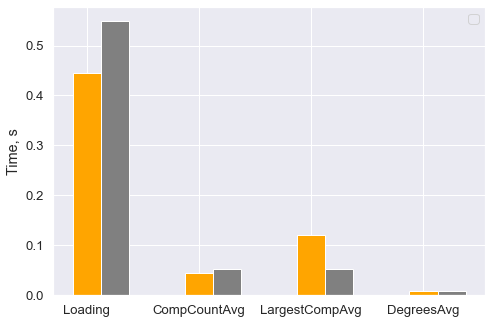

In [17]:
data = [t, t_nx]

labels = ['Loading', 'CompCountAvg', 'LargestCompAvg', 'DegreesAvg']

x = np.arange(len(labels))  # the label locations

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Time, s')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar(x + 0.00, data[0], color = 'orange', width = 0.25, label='abacaba')
ax.bar(x + 0.25, data[1], color = 'gray', width = 0.25)

In [ ]:
t = []
t_nx = []

# Число треугольников, глобальный и кластерный коэффициенты

## graphlib

In [19]:
start = time.time()

for i in range(10):
    n_of_triangles = tls.number_of_triangles(G)

end = time.time()
t.append((end - start)/10)

In [20]:
start = time.time()

for i in range(10):
    average_cluster_coef = tls.average_clustering_coefficient(G)

end = time.time()
t.append((end - start)/10)

## external

In [21]:
start = time.time()

for i in range(10):
    n_of_triangles_nx = sum(nx.triangles(G_nx).values()) / 3

end = time.time()
t_nx.append((end - start)/10)

In [22]:
start = time.time()

for i in range(10):
    average_coef_nx = nx.average_clustering(G_nx)

end = time.time()
t_nx.append((end - start)/10)

In [23]:
print(f'Число треугольников в графе - {n_of_triangles_nx}')
print(f'Средний кластерный коэффициент сети - {average_coef_nx}')

Число треугольников в графе - 1351441.0
Средний кластерный коэффициент сети - 0.6305932411707943


No handles with labels found to put in legend.


<BarContainer object of 2 artists>

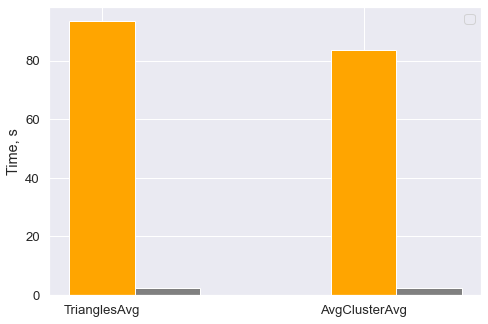

In [24]:
data = [t, t_nx]

labels = ['TrianglesAvg', 'AvgClusterAvg']

x = np.arange(len(labels))  # the label locations

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Time, s')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar(x + 0.00, data[0], color = 'orange', width = 0.25, label='abacaba')
ax.bar(x + 0.25, data[1], color = 'gray', width = 0.25)

In [ ]:
t = []
t_nx = []

# Метрические характеристики графа

## Graphlib

In [ ]:
start = time.time()

diam, radius, percentile = tls.approximate_statistic(largest_component, number=500)

end = time.time()
t.append((end - start))

In [ ]:
print(f'Диаметр наибольшей компоненты (приближенно): {diam}')
print(f'Радиус наибольшей компоненты (приближенно): {radius}')
print(f'90% процентиль геодезического расстояния в наибольшей компоненте (приближенно): {percentile}')

In [ ]:
data = [t]

labels = ['StatAvg']

x = np.arange(len(labels))  # the label locations

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Time, s')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar(x + 0.00, data[0], color = 'orange', width = 0.25, label='abacaba')
ax.bar(x + 0.25, data[1], color = 'gray', width = 0.25)